# Notæ 9


## Título?

Introducción. El objetivo del notebook es (1) la asistencia computacional en el estudio de conjeturas: asistencia en la prueba de teoremas o construcción de contraejemplos, (2) inferir propiedades sobre la estructura de las soluciones para la posterior postulación de conjeturas o demostración de teoremas.

Hay bases de datos con todos los grafos de hasta cierto tamaño, también clasificados por familia: 

https://users.cecs.anu.edu.au/~bdm/data/graphs.html

Permite realizar inspección exhaustiva (por fuerza bruta) de propiedades/conjeturas sobre todos los grafos pequeños.

## 1. Descargando los datasets

En el Notebook 5, aprendimos a generar datasets usando generadores para diferentes clases de grafos, como por ejemplo, grafos generales aleatorios, bipartitos aleatorios, split aleatorios, webs, etc...

En este Notebook, vamos a seguir un enfoque diferente. Vamos a descargar datasets de la siguiente página web:

<a href="https://users.cecs.anu.edu.au/~bdm/data/graphs.html"> https://users.cecs.anu.edu.au/~bdm/data/graphs.html </a>

Esta página web, tiene generados exhaustivamente todos los grafos posibles con hasta cierto número de vértices (salvo isomorfismo). A su vez, también los tiene filtrados según ciertas clases de grafos: conexos, cordales, perfectos, planares, auto-complementarios, etc...

Por ejemplo, todos los grafos conexos de 4 vértices se enumeran en el siguiente link:

<a href="https://users.cecs.anu.edu.au/~bdm/data/graph4c.g6"> https://users.cecs.anu.edu.au/~bdm/data/graph4c.g6</a>

Podemos ingresar al link y copiar su contenido manualmente. Pero... ya que estamos usando Python, aprovechemos su flexibilidad para automatizar este proceso. Usaremos el módulo <code>requests</code> de Python para recuperar el contenido de una página web (obviamente necesitará conexión a Internet para ejecutar la siguiente celda).

In [4]:
import requests

f = requests.get("https://users.cecs.anu.edu.au/~bdm/data/graph4c.g6")
print(f.text)

CF
CU
CV
C]
C^
C~



Este formato contiene una linea por cada posible grafo. En total hay 4 grafos conexos no isomorfos de 6 vértices. Para otros números de vértices, sugerimos consultar la secuencia <a href="https://oeis.org/A001349"> A001349</a>  (tener en cuenta que la secuencia comienza desde 0 vértices). Además, cada línea codifica un grafo en formato graph6.

Intentemos construir el grafo asociado a cada codificación, mediante el paquete <code>NetworkX</code>. Para ejemplificar, usaremos la primer linea.

In [5]:
grafo_codificado = f.text.split()[0]

Vamos a utilizar la función <code>from_graph6_bytes</code> de <code>NetworkX</code>, la cual toma una cadena de texto codificada en formato graph6 y la convierte en un grafo. En este punto hay que hacer una aclaración, esta función, en lugar de una string, toma bytes. Por el momento, no nos preocupemos por entender qué son los bytes o para qué se usan. Para solucionar esto, necesitamos un paso intermedio donde convertimos la string a bytes.

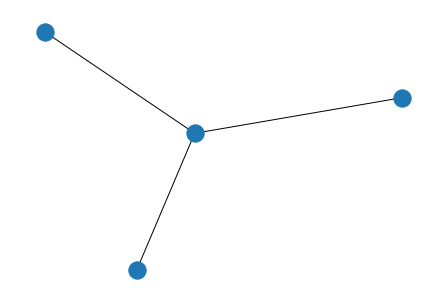

In [6]:
import networkx as nx

grafo_codificado_bytes = bytes(grafo_codificado, "utf-8")
grafo = nx.from_graph6_bytes(grafo_codificado_bytes)
nx.draw(grafo)

Ok, ahora que ya entendemos el transfondo de lo que vamos a hacer, podemos empezar a contruir nuestro dataset. Primero vamos a descargar a nuestra máquina todos los grafos conexos con 2, 3, 4, 5, 6, 7, 8, 9, y 10 vértices.

Podemos hacer esto de forma manual, es decir, por ejemplo, para descargar el dataset de grafos conexos de 2 vértices, primero ingresamos a <a href="https://users.cecs.anu.edu.au/~bdm/data/graph2c.g6"> https://users.cecs.anu.edu.au/~bdm/data/graph2c.g6</a>, y luego apretamos el click derecho y elegimos "Guardar como...".

Sin embargo, es más rápido (y divertido) automatizarlo con Python. Veamos cómo hacer esto. Primero creamos un directorio de trabajo donde vamos a guardar nuestros datasets. El directorio se llamará "dataset-n9". Usamos el argumento <code>exist_ok=True</code> para evitar que Python lance una excepción si el directorio ya existía (por ejemplo, si volvemos a ejecutar la celda).

In [7]:
import os

dirName = "dataset-n9"
os.makedirs(dirName, exist_ok=True)

Ahora vamos a descargar los datasets. Primero especificamos la url y creamos una lista con los datasets que queremos descargar. Por el momento, ignoremos el dataset con los grafos conexos de 10 vértices.

In [8]:
url = "https://users.cecs.anu.edu.au/~bdm/data/"
datasets = [f"graph{n}c.g6" for n in [2,3,4,5,6,7,8,9]]

print(url)
print(datasets)

https://users.cecs.anu.edu.au/~bdm/data/
['graph2c.g6', 'graph3c.g6', 'graph4c.g6', 'graph5c.g6', 'graph6c.g6', 'graph7c.g6', 'graph8c.g6', 'graph9c.g6']


Ahora, obtenemos el texto que codifica a cada dataset y lo escribimos en un archivo local con el mismo nombre, dentro del directorio <code>dirName</code>.

In [ ]:
for dataset in datasets:
    respuesta = requests.get(url + dataset)
    with open(dirName + "/" + dataset, "w") as file:
        file.write(respuesta.text)

¡Listo! Para verificar, podemos listar el directorio para verificar que los archivos se hayan creado. También podemos mostremos el contenido de alguno de ellos.

In [17]:
os.listdir(dirName)

['graph6c.g6',
 'graph5c.g6',
 'graph9c.g6',
 'graph10c.g6',
 'graph3c.g6',
 'graph10c.g6.gz',
 'graph7c.g6',
 'graph8c.g6',
 'graph4c.g6',
 'graph2c.g6']

In [19]:
with open(dirName + "/" + "graph4c.g6", "r") as file:
    print(file.read())

CF
CU
CV
C]
C^
C~



Volvamos ahora al dataset con los grafos conexos de 10 vértices. El inconveniente con él, es que se encuentra comprimido como un archivo *gzip*. Con algunos pasos extras, es posible manejarlo. Al igual que antes, comenzamos por obtener el texto que codifica el dataset y lo escribimos en un archivo local, con dos diferencias:
* El archivo estará comprimido como un archivo *gzip*, por eso su extensión ".gz".
* En lugar de escribir el texto como una cadena de caracteres (string), lo escribiremos como una cadena de bytes. Por el momento no vamos a profundizar en este tema, sólo mencionar que es necesario para poder descomprimirlo. Por este motivo, el modo de apertura del archivo es "wb" y escribimos el atributo <code>content</code> en lugar de <code>text</code>.

**Nota.** El archivo pesa 30 MB, por lo que la ejecución de la siguiente celda puede demorar dependiendo de la velocidad de conexión.

In [15]:
respuesta = requests.get("https://users.cecs.anu.edu.au/~bdm/data/graph10c.g6.gz")
with open(dirName + "/graph10c.g6.gz", "wb") as file:
    file.write(respuesta.content)

Ahora si, ya estamos en condiciones de descomprimirlo. Abrimos el archivo con la función <code>open</code> del paquete <code>gzip</code>, la cual se ocupa de leer y descomprimir, y escribimos el resultado en un archivo local, con el mismo nombre pero sin la extensión ".g6".

In [16]:
import gzip

with gzip.open(dirName + "/graph10c.g6.gz", "rb") as fEntrada:
    with open(dirName + "/graph10c.g6", "wb") as fSalida:
        fSalida.write(fEntrada.read())

Imprimamos las primeras 5 líneas del archivo para verificar que salió todo ok.

In [21]:
with open(dirName + "/" + "graph10c.g6", "r") as file:
    for _ in range(5):
        print(next(file))

I??????~w

I????A?~o

I????A?~w

I????B?Nw

I????B?no



## 2. Primeros ejemplos

**Definición.** Dado un grafo $G = (V,E)$, dos vértices distintos $u,v \in V$ son **mellizos verdaderos** si tienen la misma vecindad cerrada, es decir, $N[u] = N[v]$. 

**Observación.** Para que dos vértices sean mellizos verdaderos, es necesario que sean adyacentes.

Por ejemplo, considerar el siguiente grafo:

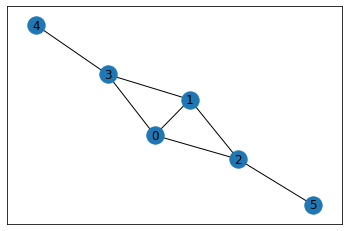

In [26]:
grafo = nx.Graph()
grafo.add_edges_from([(0,1), (0,2), (0,3), (1,2), (1,3), (3,4), (2,5)])
nx.draw_networkx(grafo)

Los vértices $0$ y $1$ son mellizos verdaderos pues: $$N[0] = N[1] = \{0,1,2,3\}.$$ Por el contrario, los vértices $2$ y $3$ no lo son, pues $$N[2] = \{0,1,2,5\} \neq \{0,1,3,4\} = N[3].$$

Supongamos que queremos determinar cuántos grafos conexos con a lo sumo 10 vértices no tienen ningún par de mellizos verdaderos.

Empecemos definiendo una función que determine si dos vértices son mellizos verdaderos y usémosla para definir una función que determine si un grafo no tiene ningún par de mellizos verdaderos.

In [55]:
def son_mellizos_verdaderos(G,u,v):
    if not G.has_edge(u,v):
        return False
    Nu = set(G.neighbors(u))
    Nu.add(u)
    Nv = set(G.neighbors(v))
    Nv.add(v)
    return (Nu == Nv)
    
assert son_mellizos_verdaderos(grafo, 0, 1)
assert not son_mellizos_verdaderos(grafo, 2, 3)

In [57]:
def no_tiene_mellizos_verdaderos(G):
    for u,v in G.edges:
        if son_mellizos_verdaderos(G, u, v):
            return False
    return True

assert not no_tiene_mellizos_verdaderos(grafo)
grafo.add_edge(1,5)
assert no_tiene_mellizos_verdaderos(grafo)

In [63]:
def contar_grafos(dirName, datasets, predicado):
    contador = 0
    for dataset in datasets:
        print("Procesando dataset:", dataset)
        with open(dirName + "/" + dataset, "rb") as file:
            # Recorrer cada linea del archivo
            for line in file:
                # Remover el salto de linea (\n)
                line = line.rstrip(b"\n")
                # Leer grafo en formato graph6
                grafo = nx.from_graph6_bytes(line)
                if predicado(grafo):
                    contador += 1
    return contador

In [70]:
datasets = [f"graph{n}c.g6" for n in [2,3,4,5,6,7,8,9,10]]

In [71]:
time(contar_grafos(dirName, datasets, no_tiene_mellizos_verdaderos))

Procesando dataset: graph2c.g6
Procesando dataset: graph3c.g6
Procesando dataset: graph4c.g6
Procesando dataset: graph5c.g6
Procesando dataset: graph6c.g6
Procesando dataset: graph7c.g6
Procesando dataset: graph8c.g6
Procesando dataset: graph9c.g6
Procesando dataset: graph10c.g6
CPU times: user 28min 35s, sys: 1.96 s, total: 28min 37s
Wall time: 28min 37s


10014006

Ejercicio. ¿Cúantos grafos conexos del dataset son regulares?

## 2. Subtítulo???

Se puede probar que el problema denominado \emph{Signed Domination} es equivalente, desde el punto de vista de su complejidad computacional con resolver el problema de Empaquetamiento Gneralizado restringido a ciertas instancias particulares.

Dado un grafo $G=(V,E)$ y dos vectores $\mathbf k, \textbf{u} \in \Z_+^V$, $f:V\rightarrow \Z_+$ es una función de $(\k,\u)$-empaquetamiento si para todo $v\in V$ se verifica $f(v)\leq u(v)$ y $f(N[v])\leq k(v)$. El Problema Generalizado de empaquetamiento consiste en calcular
$$ L_{\k,\u}(G)=\max \{f(V): f \text{ una función de } (\k,\u)\text{-empaquetamiento de } G\}.$$

Se puede probar que resolver el problema denominado \emph{Signed Domination Problem} \cite{leechand} sobre un grafo $G=(V,E)$ es equivalente, desde el punto de vista de su complejidad computacional, a calcular $L_{\k,\u}(G)$ con $k(v)=\delta(v)$ y $u(v)=2$, para todo $v\in V$.

Claramente, si toda funcion de $(\k,\u)$-empaquetamiento de $G$ debe verificar $f(N[v])\leq \delta(v)$ necesariamente para todo $v$, $f(w)=0$ para algun $w\in \N[v]$. O sea, el conjunto de vértices $\mathcal N$ donde $f$ es nula debe ser un conjunto dominante, esto es, $\mathcal N \cap N[v]\neq \emptyset$, para todo $v$. 

Entonces, una función que vale cero en una conjunto dominante mínimo de $G$ y uno en el resto es una funcion de $(\k,\u)$-empaquetamiento de $G$ de valor $n-\gamma(G)$, donde $n$ es el número de vértices de $G$ y $\gamma(G)$ su número de dominación.

Por otro lado, si subimos al valor 2 el valor de la función propuesta sobre un vértice, deberemos bajar de 1 a 0 el valor de al menos un vertice en las vecindades de todos sus vecinos. 

Estas dos observaciones nos llevan a pensar si la solución propuesta no será la solución óptima. Esto es, si será cierto o no que 
$$L_{\k,\u}(G)=n-\gamma(G).$$


{\textbf{Ejercicio 1}}

Encontrar un contraejemplo en grafos de 
a lo sumo 10 nodos. 

\medskip 

{\textbf{Ejercicio 2}}

Si el primer contraejemplo tiene $p$ nodos, buscar para cada $r\in [p+1,10]$ un contraejemplo con $r$ nodos, si existe. 

\medskip 

{\textbf{Ejercicio 3}}

Analizar las soluciones optmimas encontradas en estos ejemplos y tratar de concluir alguna propiedad no tenida en cuanta al momento de establecer la conjetura y que la hace fallar.



    
\begin{thebibliography}{99}
\bibitem{leechang}
Lee, C.M., Chang, M.S., 2008. Variations of Y-dominating functions on graphs. Discrete Mathematics 308, 4185–4204.
\end{thebibliography}

## 3. Subtítulo???

Definir grafo planar y triangle free.

Es sabido que todo grafo planar se puede pintar con al menos 4 colores (Teorema de los 4 colores). Si además de planar, también pedimos que sea triangle-free, podemos encontrar siempre un coloreo con al menor 3 colores?

Ejercicio. Responder a esa pregunta. Si, es un teorema. Mandarlos a google a leer el teorema.

Es sabido que la distancia entre el nro de clique y el nro cromático puede ser tan grande como se quiera. ¿cuál será el grafo triangle-free más chico que no se pueda pintar con 3 colores?

Ejercicio. Buscarlo... No lo van a encontrar.

Dar la construcción de mysielski e implementar funciones que hagan la construcción. Usarlas para verificar que M(C5) es el contraejemplo. 

## 4. Subtítulo???

Conjetura abierta del coloreo aditivio. Daniel?